In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.datasets import load_iris
from sklearn.datasets import make_blobs
from sklearn.cluster import kmeans_plusplus
from sklearn.mixture import GaussianMixture
from scipy.spatial import Voronoi, voronoi_plot_2d
from sklearn.metrics import silhouette_score
from scipy import stats 

In [2]:
data1 = load_iris()
y = data1.target

In [3]:
data1.target[[10, 25, 50]]

array([0, 0, 1])

In [4]:
list(data1.target_names)

['setosa', 'versicolor', 'virginica']

In [5]:
df = pd.DataFrame(data = np.c_[data1['data'], data1['target']],
                 columns = data1['feature_names'] + ['target'])

In [6]:
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
6,4.6,3.4,1.4,0.3,0.0
7,5.0,3.4,1.5,0.2,0.0
8,4.4,2.9,1.4,0.2,0.0
9,4.9,3.1,1.5,0.1,0.0


In [7]:
df.rename(columns={'sepal length (cm)': 'sepal_length'}, inplace = True)

In [8]:
df.rename(columns={'sepal width (cm)': 'sepal_width'}, inplace = True)

In [9]:
df.rename(columns={'petal length (cm)':'petal_length'}, inplace = True)

In [10]:
df.rename(columns={'petal width (cm)': 'petal_width'}, inplace = True)

In [11]:
df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [12]:
df.shape

(150, 5)

In [13]:
df.describe()
# get a basic survey of statistical details including mean, percentiles,
# quartiles, standard deviation, count, maximum, minimum values in data

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Data Visualization: the first thing to do with a data set is to see the data.

Text(0, 0.5, 'Sepal Length (CM)')

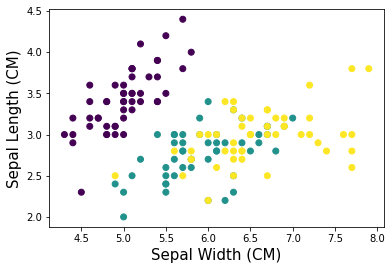

In [14]:
# Implementing a scatter plot which uses dots to demonstrate values for 
# different numeric variables. I want to check some relationships out.

plt.scatter(x = df['sepal_length'], y = df['sepal_width'], c = df.target,
           cmap = 'viridis')
plt.xlabel('Sepal Width (CM)', fontsize = 15)
plt.ylabel('Sepal Length (CM)', fontsize = 15)

Text(0, 0.5, 'Petal Length (CM)')

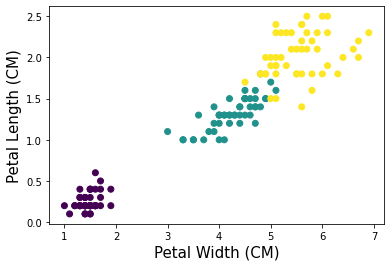

In [15]:
# Implementing a scatter plot which uses dots to demonstrate values for 
# different numeric variables. I want to check some relationships out.

plt.scatter(x = df['petal_length'], y = df['petal_width'], c = df.target,
           cmap = 'viridis')
plt.xlabel('Petal Width (CM)', fontsize = 15)
plt.ylabel('Petal Length (CM)', fontsize = 15)

[Added step A] - Use GMM to separate the clusters using all 4 features: petal length & width, and sepal length & width. Map each cluster to a class by picking the most common class for each cluster (using the scipy.stats.mode() function):   = 1.5 pt.

### Gaussian Mixture Models:
#### probabilitstic model that assumes all the data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters. Mixture models can e thought of as generalizing k-means clustering to incorporate information about the covariance structure of the data as well as the centers of the latent Gaussians.

In [16]:
EM = GaussianMixture(n_components = 3)

features = ["sepal_length", "sepal_width", "petal_length", "petal_width", "target"]

X = df[features]

# GMM below

EM.fit(df)

cluster = EM.predict(df)

cluster

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [17]:
cluster_p = EM.predict_proba(X)

# predict_proba: generic function that predicts class probabilities 
# this is the probabilistic assignment

cluster_p
# probability that the data point is in each of the clusters

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1

In [18]:
# time to implement KMeans
from sklearn.cluster import KMeans
clf = KMeans(n_clusters = 5)

# Fit KMeans model to the data set
y_pred = clf.fit_predict(X)

# Print out the values of the center of the clusters learned by the KMeans classifier
print("Centroids: ")
print(clf.cluster_centers_)
print()

# Print the first few labels
print("First 5 labels: ")
print(y_pred[:5])

Centroids: 
[[5.006      3.428      1.462      0.246      0.        ]
 [6.31714286 2.92285714 5.31142857 2.01142857 2.        ]
 [5.53214286 2.63571429 3.96071429 1.22857143 1.03571429]
 [6.3826087  2.92173913 4.63478261 1.46086957 1.        ]
 [7.38571429 3.13571429 6.22857143 2.08571429 2.        ]]

First 5 labels: 
[0 0 0 0 0]


[Added step B] - Report value of np.sum(y_pred==y) / len(y_pred) = 0.5 pt.

In [19]:
print("Accuracy = " + str(np.sum(cluster) / len(cluster)))

Accuracy = 1.0


In [20]:
# specifying 3 clusters here
kmeans = KMeans(n_clusters = 3)

In [21]:
kmeans

KMeans(n_clusters=3)

In [22]:
y_pred = kmeans.fit_predict(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

In [23]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [24]:
df['cluster'] = y_pred # create a new column in my dataframe
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,cluster
0,5.1,3.5,1.4,0.2,0.0,1
1,4.9,3.0,1.4,0.2,0.0,1
2,4.7,3.2,1.3,0.2,0.0,1
3,4.6,3.1,1.5,0.2,0.0,1
4,5.0,3.6,1.4,0.2,0.0,1


Plotting Blobs - generating Gaussian blobs to be clustered when we have an int, it represents the total # of points equally divided among the clusters
if we have an array, each element of the sequence indicates the # of samples per cluster

[Added step C] - Generate blobs from a new dataset, use “ from sklearn.datasets import make_blobs” . Use the following parameters

In [25]:
X, y = make_blobs(n_samples = 2000, n_features = 2, centers = np.array(
    [[ 0.2,  2.3],
     [-1.5,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]]),
     cluster_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1]), random_state = None)

# I will now detail information about the blobs
print(X.shape)
print("The number of generated clusters: ", 5)
print("We have ", 2000, " samples in the data set.")
print("Observe the input features: ", X[:5])
print("Observe the target classes: ", y[:5])

(2000, 2)
The number of generated clusters:  5
We have  2000  samples in the data set.
Observe the input features:  [[-2.72675256  1.26246987]
 [-1.3586209   2.41772263]
 [-2.80697873  2.75114832]
 [-2.79802609  1.26734834]
 [-2.8707054   1.41973747]]
Observe the target classes:  [4 1 3 4 4]


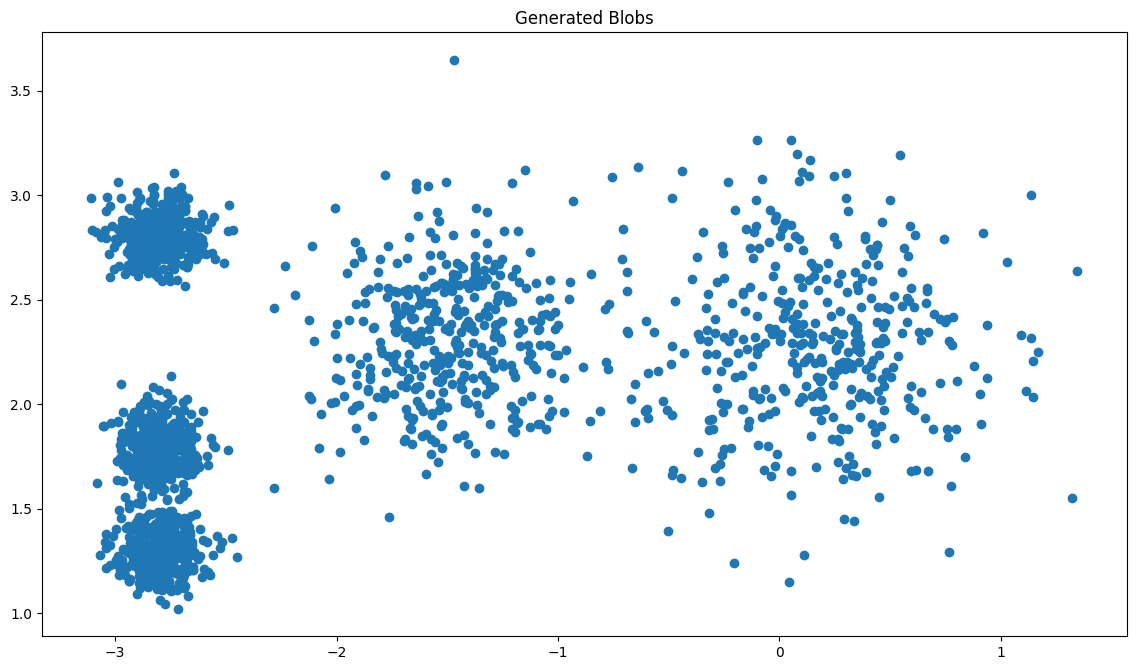

In [26]:
# visually representing each of the blobs
plt.figure(figsize=(14, 8), dpi = 100)
plt.title("Generated Blobs")
plt.scatter(X[:,0], X[:,1])

# display the plot
plt.show()

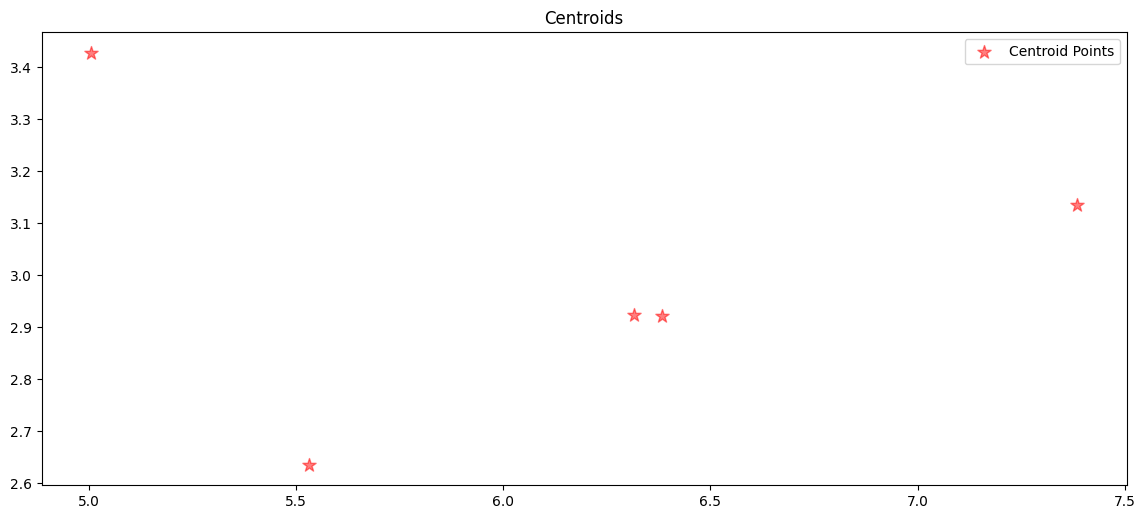

In [27]:
# Data visualizations for centroids
plt.figure(figsize = (14, 6), dpi = 100)
plt.title("Centroids")
plt.scatter(clf.cluster_centers_[:, 0], clf.cluster_centers_[:, 1], c = "red", marker = "*", 
            s = 100, alpha = 0.5, label = "Centroid Points")
plt.legend()

# visually display the plot
plt.show()

In [40]:
# Array of new instances
X_new_arr = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])

# predicting labels of the new instances
clf.predict(X_new_arr)

array([7, 3, 0, 0], dtype=int32)

In [41]:
# Demonstrate the distance from each of the above points
# to the centroids for the new data
clf.transform(X_new_arr)

array([[2.90752132, 1.13686963, 2.88553649, 0.48230198, 2.8105263 ,
        1.68311175, 0.72407729, 0.22569368, 1.62765263],
       [5.84944671, 4.11985458, 5.84126707, 2.53969898, 5.80684241,
        4.68132513, 2.97163798, 3.22489236, 4.54933373],
       [0.28353312, 2.03780612, 1.7131474 , 3.57074918, 1.21610604,
        1.59913643, 3.12863657, 2.94321977, 1.54154014],
       [0.36859505, 1.90583278, 1.21801369, 3.48320321, 0.72719026,
        1.37988453, 3.12300419, 2.8164239 , 1.49639815]])

In [42]:
# Now we plot the centroid with their corresponding variable
var = clf.cluster_centers_

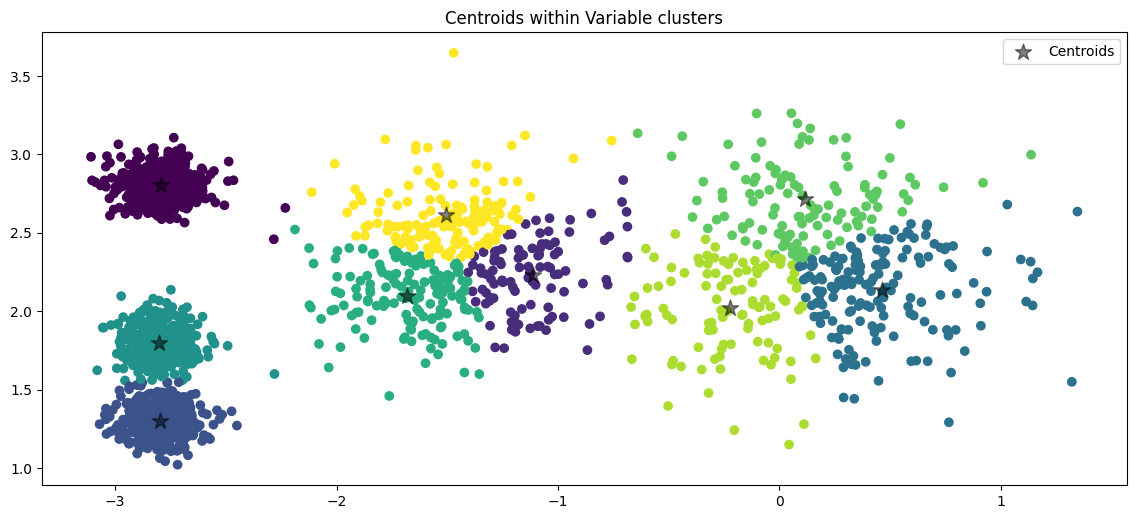

In [43]:
# Visually represent the clusters and centers
plt.figure(figsize=(14, 6), dpi = 100)
plt.title("Centroids within Variable clusters")
plt.scatter(X[:, 0], X[:, 1], c = clf.labels_, cmap = "viridis")
plt.scatter(var[:, 0], var[:, 1], c = "black", s = 150, alpha = 0.5, 
                label = "Centroids", marker = "*")
plt.legend(loc="upper right")
plt.show()

#### Scipy Spatial Voronoi

https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.Voronoi.html

<Figure size 840x600 with 0 Axes>

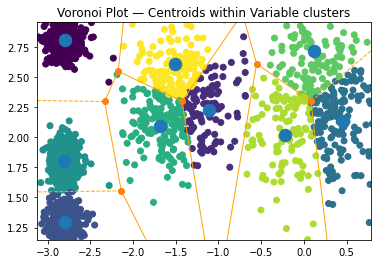

In [44]:
# Time to plot the Voronoi Plot
from scipy.spatial import Voronoi, voronoi_plot_2d

# Voronoi will be used to plot the decision boundaries between classes
vor = Voronoi(var)
plt.figure(figsize = (14, 10), dpi = 60)
voronoi_plot_2d(vor, point_size = 25, line_colors = 'orange')
plt.title("Voronoi Plot — Centroids within Variable clusters")
plt.scatter(X[:, 0], X[:, 1], c = clf.labels_, cmap = "viridis")
plt.show()

In [45]:
# Set values of k = 3 and k = 8, explain your results in both cases by means of the resultant intertia 
clf2 = KMeans(n_clusters = 3)
clf3 = KMeans(n_clusters = 8)

# Fitting KMeans to our data set
y_pred2 = clf2.fit_predict(X)
y_pred3 = clf3.fit_predict(X)

In [46]:
print("There are 3 clusters in this scenario.")
print("Centroids when there are 3 clusters: ", clf2.cluster_centers_) 

There are 3 clusters in this scenario.
Centroids when there are 3 clusters:  [[-2.79705443  1.55079991]
 [ 0.04655028  2.27755831]
 [-2.20897174  2.58264363]]


In [47]:
print("First 10 labels when we have 3 clusters:", y_pred2[:10])

First 10 labels when we have 3 clusters: [0 2 2 0 0 1 0 0 2 1]


In [48]:
print("There are 8 clusters in this scenario.")
print("Centroids when there are 8 clusters: ", clf3.cluster_centers_)

There are 8 clusters in this scenario.
Centroids when there are 8 clusters:  [[-0.31549011  2.01163848]
 [-2.79901336  1.29868333]
 [-1.58798557  2.08775943]
 [-2.79053669  2.80465004]
 [ 0.44558542  2.12599315]
 [ 0.11189017  2.69403961]
 [-1.38139212  2.5501113 ]
 [-2.80339344  1.79989177]]


In [49]:
print("First 10 labels when we have 8 clusters:", y_pred3[:10])

First 10 labels when we have 8 clusters: [1 6 3 1 1 4 7 1 2 4]


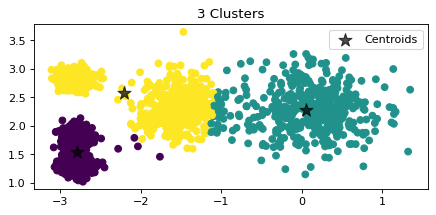

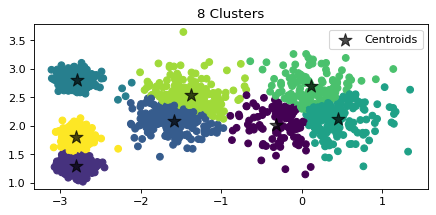

In [50]:
var2 = clf2.cluster_centers_

plt.figure(figsize=(14,6), dpi = 80)
plt.subplot(2, 2, 2)
plt.scatter(X[:, 0], X[:,1], c = clf2.labels_, cmap = "viridis")
plt.scatter(var2[:, 0], var2[:, 1], c = "black", s = 150, alpha = 0.7, label = "Centroids",
           marker = "*")
plt.legend(loc="upper right")
plt.title("3 Clusters")

var3 = clf3.cluster_centers_

plt.figure(figsize=(14,6), dpi = 80)
plt.subplot(2, 2, 2)
plt.scatter(X[:, 0], X[:,1], c = clf3.labels_, cmap = "viridis")
plt.scatter(var3[:, 0], var3[:, 1], c = "black", s = 150, alpha = 0.7, label = "Centroids",
           marker = "*")
plt.legend(loc="upper right")
plt.title("8 Clusters")

plt.show()

Inertia values when we have clusters of 3 and 8 respectively: 
Inertia when there are 3 clusters: 642.4273988120158
Inertia when there are 8 clusters: 122.05761533505087
[1148.2367224781785, 642.3936332544657, 263.9293923297819, 213.56026638368633, 174.29119661219076, 145.91659876863173, 122.05761533505088, 108.48895617799843]
Consider the following as the graph decreases in the number of clusters


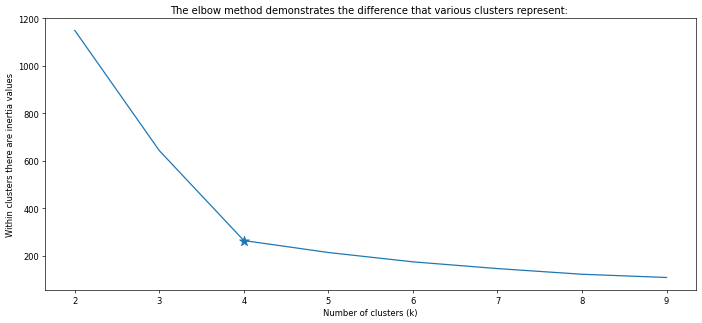

Inertia when there are 3 clusters (k = 3): 642.4273988120158
Inertia when there are 3 clusters (k = 8): 122.05761533505087
The best value for clustering the blobs is when we have 4 clusters as it represents the elbow. A lower value has significant drop off and values greater than 4 aren't as useful.
Inertia is our sum of squared errors. We want a small inertia as a smaller sum of squared errors is ideal.
Notice that inertia values go down when we increase our clusters from 3 to 8. Then, the inertia values don't change by much.
The difference in these 2 inertia values is 524.6603


In [51]:
# Demonstrate inertia values - sum of squared errors when used in KMeans
print("Inertia values when we have clusters of 3 and 8 respectively: ")
print("Inertia when there are 3 clusters:", clf2.inertia_)
print("Inertia when there are 8 clusters:", clf3.inertia_)

arr = []
for i in range(2, 10):
    clf = KMeans(i)
    clf.fit(X)
    arr_accum = clf.inertia_
    arr.append(arr_accum)
    
print(arr)
print("Consider the following as the graph decreases in the number of clusters")

# Now we implement the elbow method
plt.figure(figsize = (14, 6), dpi = 60)
cluster_num = range(2, 10)
plt.plot(cluster_num, arr)
plt.scatter(4, arr[2], marker = "*", s = 150)
plt.title("The elbow method demonstrates the difference that various clusters represent: ")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Within clusters there are inertia values")
plt.show()

# Showing inertia values at 3 clusters and at 8 clusters
print("Inertia when there are 3 clusters (k = 3):", clf2.inertia_)
print("Inertia when there are 3 clusters (k = 8):", clf3.inertia_)
print("The best value for clustering the blobs is when we have 4 clusters as it represents the elbow. A lower value has significant drop off and values greater than 4 aren't as useful.")
print("Inertia is our sum of squared errors. We want a small inertia as a smaller sum of squared errors is ideal.")
print("Notice that inertia values go down when we increase our clusters from 3 to 8. Then, the inertia values don't change by much.")
print("The difference in these 2 inertia values is", 646.2302-121.5699)